<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Full-model-develpoment-cycle" data-toc-modified-id="Full-model-develpoment-cycle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Full model develpoment cycle</a></span><ul class="toc-item"><li><span><a href="#Packages-import,-data-visualisation,-data-cleaning" data-toc-modified-id="Packages-import,-data-visualisation,-data-cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages import, data visualisation, data cleaning</a></span></li><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Multivariate-analysis" data-toc-modified-id="Multivariate-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multivariate analysis</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model Selection</a></span></li></ul></li></ul></div>

# Full model develpoment cycle

Reminder:

There are 5 main steps in building a greate regression model

1. Univariate anlysis
2. Multivariate analysis
3. Feature selection
4. Model Training and Evaluation (for all potential model candidates)
5. Best Model Selection

## Packages import, data visualisation, data cleaning

In [1]:
import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# splitting the data
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
receipe_data = pd.read_csv('receipes.csv', index_col=0)

In [3]:
receipe_data.shape

(20052, 15)

In [4]:
receipe_data.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  dinner  lunch  dessert  drink  dairy free  vegetarian  \
0   7.0   559.0     0.0    0.0      0.0    0.0         0.0         0.0   
1  23.0  1439.0     0.0    0.0      0.0    0.0         0.0         0.0   
2   7.0   165.0     0.0    0.0      0.0    0.0         0.0         0.0   
3   NaN     NaN     1.0    0.0      0.0    0.0         1.0         0.0   
4  32.0   452.0     0.0    0.0      0.0    0.0         0.0         1.0   

   seafood  low carb  low cholesterol  
0      0.0       0.0              0.0  
1      0.0       0.0              0.0  
2      0.0       0.0              0.0  
3      0.0       0.0              0.0  
4      0.0       0.0              0.0

In [5]:
receipe_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 0 to 20051
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            20052 non-null  object 
 1   rating           20052 non-null  float64
 2   calories         15935 non-null  float64
 3   protein          15890 non-null  float64
 4   fat              15869 non-null  float64
 5   sodium           15933 non-null  float64
 6   dinner           20052 non-null  float64
 7   lunch            20052 non-null  float64
 8   dessert          20052 non-null  float64
 9   drink            20052 non-null  float64
 10  dairy free       20052 non-null  float64
 11  vegetarian       20052 non-null  float64
 12  seafood          20052 non-null  float64
 13  low carb         20052 non-null  float64
 14  low cholesterol  20052 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.4+ MB


In [6]:
receipe_data.dropna(inplace=True)

In [7]:
receipe_data.shape

(15864, 15)

In [8]:
receipe_data.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   
5                               The Best Blts    4.375     948.0     19.0   

    fat  sodium  dinner  lunch  dessert  drink  dairy free  vegetarian  \
0   7.0   559.0     0.0    0.0      0.0    0.0         0.0         0.0   
1  23.0  1439.0     0.0    0.0      0.0    0.0         0.0         0.0   
2   7.0   165.0     0.0    0.0      0.0    0.0         0.0         0.0   
4  32.0   452.0     0.0    0.0      0.0    0.0         0.0         1.0   
5  79.0  1042.0     0.0    0.0      0.0    0.0         0.0         0.0   

   seafood  low carb  low cholesterol  
0      0.0       0.0              0.0  
1      0.0       0.0              0.0  
2      0.0       0.0              0.0  
4      0.0       0.0              0.0  
5      0.0       0.0              0.0

In [9]:
# Example: get the rows that have dessert equal to 1.0
data_dessert = receipe_data[(receipe_data['dessert']==1.0)]
# Exaple: ger the rows that have lunch AND dinner equal to 1.0
data_lunch_and_dinner = receipe_data[(receipe_data['lunch']==1.0) & (receipe_data['dinner']==1.0)]

# Filter the rows, where lunch OR dinner equal to 1.0
data_lunch_or_dinner = receipe_data[(receipe_data['lunch']==1.0) | (receipe_data['dinner']==1.0)]
data_lunch_or_dinner.head()

title  rating  calories  \
9   Ham Persillade with Mustard Potato Salad and M...   3.750     602.0   
19  Tuna, Asparagus, and New Potato Salad with Chi...   5.000     421.0   
26                          Cucumber-Basil Egg Salad    3.750     215.0   
35                                     Aztec Chicken    3.750     625.0   
50                   Mexican Chile and Mushroom Soup    3.125     166.0   

    protein   fat  sodium  dinner  lunch  dessert  drink  dairy free  \
9      23.0  41.0  1696.0     0.0    1.0      0.0    0.0         1.0   
19     10.0  33.0   383.0     0.0    1.0      0.0    0.0         1.0   
26      6.0  20.0   250.0     1.0    1.0      0.0    0.0         1.0   
35     39.0  44.0  1248.0     1.0    0.0      0.0    0.0         0.0   
50      8.0  12.0   508.0     0.0    1.0      0.0    0.0         1.0   

    vegetarian  seafood  low carb  low cholesterol  
9          0.0      0.0       0.0              0.0  
19         0.0      0.0       0.0              0.0  
26         1.0      0.0       0.0              0.0  
35         0.0      0.0       0.0              0.0  
50         0.0      0.0       0.0              0.0

In [10]:
data_lunch_or_dinner.shape

(2448, 15)

In [11]:
data_lunch_or_dinner.describe()

rating      calories        protein            fat        sodium  \
count  2448.000000  2.448000e+03    2448.000000    2448.000000  2.448000e+03   
mean      3.921569  4.104272e+03     234.106618     225.220997  3.654572e+03   
std       1.155744  1.187899e+05    6757.324849    6329.069028  8.960562e+04   
min       0.000000  3.000000e+00       0.000000       0.000000  2.000000e+00   
25%       3.750000  3.170000e+02      13.000000      16.000000  2.970000e+02   
50%       4.375000  5.165000e+02      28.000000      29.000000  6.425000e+02   
75%       4.375000  8.100000e+02      48.000000      50.000000  1.137750e+03   
max       5.000000  4.157357e+06  236489.000000  221495.000000  3.134853e+06   

            dinner        lunch      dessert   drink   dairy free  \
count  2448.000000  2448.000000  2448.000000  2448.0  2448.000000   
mean      0.775327     0.383170     0.003676     0.0     0.395425   
std       0.417452     0.486258     0.060535     0.0     0.489042   
min       0.000000     0.000000     0.000000     0.0     0.000000   
25%       1.000000     0.000000     0.000000     0.0     0.000000   
50%       1.000000     0.000000     0.000000     0.0     0.000000   
75%       1.000000     1.000000     0.000000     0.0     1.000000   
max       1.000000     1.000000     1.000000     0.0     1.000000   

        vegetarian      seafood     low carb  low cholesterol  
count  2448.000000  2448.000000  2448.000000      2448.000000  
mean      0.234069     0.075163     0.017974         0.029003  
std       0.423502     0.263709     0.132883         0.167850  
min       0.000000     0.000000     0.000000         0.000000  
25%       0.000000     0.000000     0.000000         0.000000  
50%       0.000000     0.000000     0.000000         0.000000  
75%       0.000000     0.000000     0.000000         0.000000  
max       1.000000     1.000000     1.000000         1.000000

## Univariate analysis

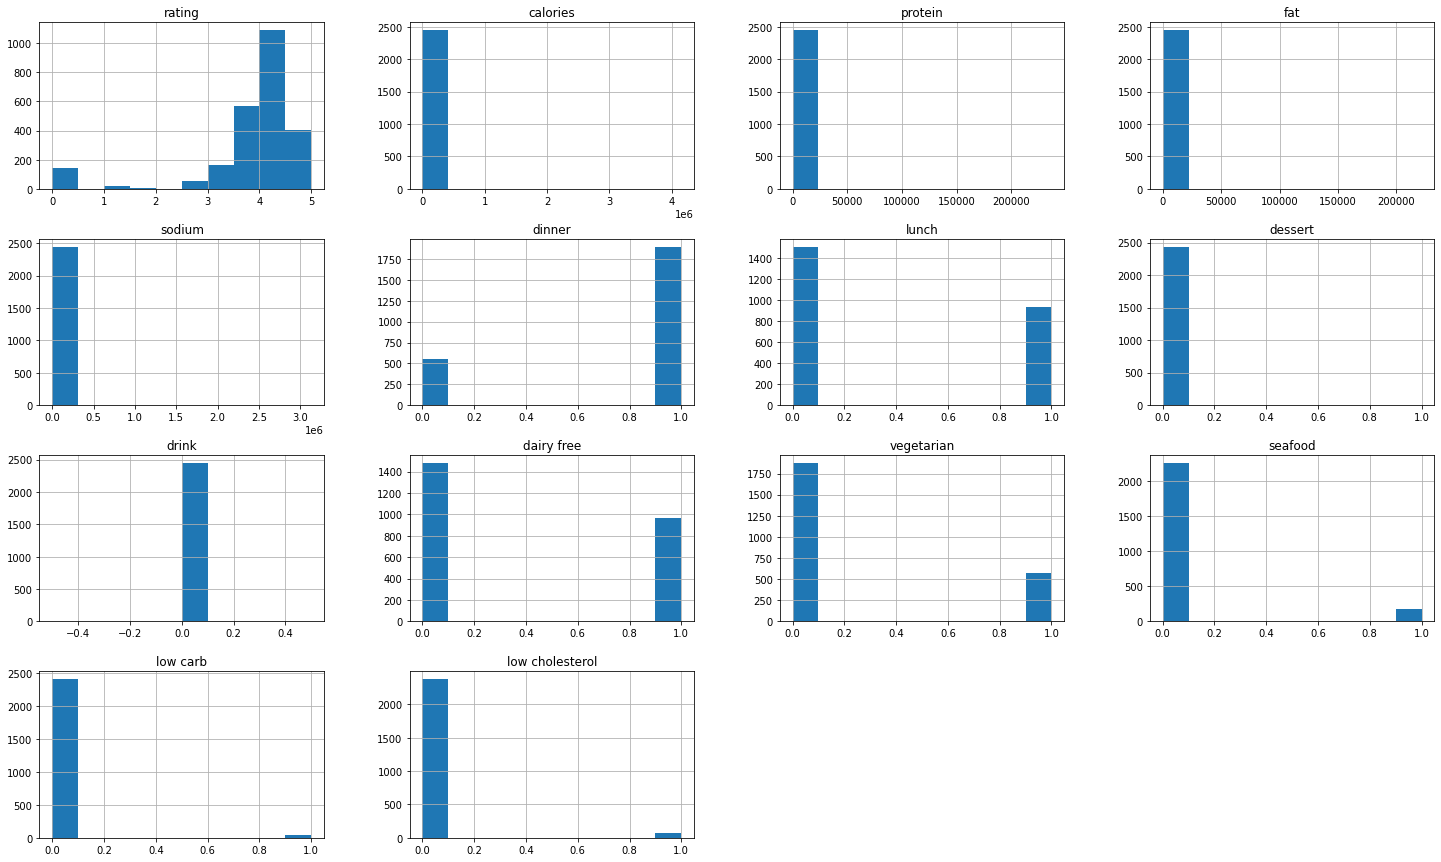

In [12]:
data_lunch_or_dinner.hist(bins=10, figsize=(25,15))
plt.show()

In [13]:
print(data_lunch_or_dinner.fat.median(), data_lunch_or_dinner.fat.mean(), max(data_lunch_or_dinner.fat))
print(data_lunch_or_dinner.protein.median(), data_lunch_or_dinner.protein.mean(), max(data_lunch_or_dinner.protein))
print(data_lunch_or_dinner.sodium.median(), data_lunch_or_dinner.sodium.mean(), max(data_lunch_or_dinner.sodium))
print(data_lunch_or_dinner.dessert.median(), data_lunch_or_dinner.dessert.mean(), max(data_lunch_or_dinner.dessert))

29.0 225.22099673202615 221495.0
28.0 234.1066176470588 236489.0
642.5 3654.5723039215686 3134853.0
0.0 0.003676470588235294 1.0


In [14]:
df = data_lunch_or_dinner[(data_lunch_or_dinner['fat']<=400)
                          &(data_lunch_or_dinner['protein']<=300)
                          &(data_lunch_or_dinner['sodium']<=2000)
                          &(data_lunch_or_dinner['dessert']==0.0)]

In [15]:
df.shape

(2188, 15)

In [16]:
print(df.fat.median(), df.fat.mean(), max(df.fat))
print(df.protein.median(), df.protein.mean(), max(df.protein))
print(df.sodium.median(), df.sodium.mean(), max(df.sodium))
print(df.dessert.median(), df.dessert.mean(), max(df.dessert))

26.0 36.40219378427788 310.0
25.0 32.217550274223036 267.0
557.5 657.0749542961609 2000.0
0.0 0.0 0.0


In [17]:
df.head()

title  rating  calories  \
9   Ham Persillade with Mustard Potato Salad and M...   3.750     602.0   
19  Tuna, Asparagus, and New Potato Salad with Chi...   5.000     421.0   
26                          Cucumber-Basil Egg Salad    3.750     215.0   
35                                     Aztec Chicken    3.750     625.0   
50                   Mexican Chile and Mushroom Soup    3.125     166.0   

    protein   fat  sodium  dinner  lunch  dessert  drink  dairy free  \
9      23.0  41.0  1696.0     0.0    1.0      0.0    0.0         1.0   
19     10.0  33.0   383.0     0.0    1.0      0.0    0.0         1.0   
26      6.0  20.0   250.0     1.0    1.0      0.0    0.0         1.0   
35     39.0  44.0  1248.0     1.0    0.0      0.0    0.0         0.0   
50      8.0  12.0   508.0     0.0    1.0      0.0    0.0         1.0   

    vegetarian  seafood  low carb  low cholesterol  
9          0.0      0.0       0.0              0.0  
19         0.0      0.0       0.0              0.0  
26         1.0      0.0       0.0              0.0  
35         0.0      0.0       0.0              0.0  
50         0.0      0.0       0.0              0.0

In [18]:
df.drop(['drink', 'dessert', 'title'], axis=1, inplace=True)

C:\Users\merli\AppData\Local\Temp\ipykernel_12472\2344354111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['drink', 'dessert', 'title'], axis=1, inplace=True)


In [19]:
df

rating  calories  protein   fat  sodium  dinner  lunch  dairy free  \
9       3.750     602.0     23.0  41.0  1696.0     0.0    1.0         1.0   
19      5.000     421.0     10.0  33.0   383.0     0.0    1.0         1.0   
26      3.750     215.0      6.0  20.0   250.0     1.0    1.0         1.0   
35      3.750     625.0     39.0  44.0  1248.0     1.0    0.0         0.0   
50      3.125     166.0      8.0  12.0   508.0     0.0    1.0         1.0   
...       ...       ...      ...   ...     ...     ...    ...         ...   
20021   5.000     772.0     53.0  32.0  1467.0     1.0    0.0         0.0   
20023   3.125     293.0      4.0  27.0   647.0     0.0    1.0         1.0   
20041   2.500     843.0     59.0  59.0   351.0     1.0    0.0         0.0   
20048   4.375     671.0     22.0  28.0   583.0     1.0    0.0         0.0   
20049   4.375     563.0     31.0  38.0   652.0     1.0    0.0         0.0   

       vegetarian  seafood  low carb  low cholesterol  
9             0.0      0.0       0.0              0.0  
19            0.0      0.0       0.0              0.0  
26            1.0      0.0       0.0              0.0  
35            0.0      0.0       0.0              0.0  
50            0.0      0.0       0.0              0.0  
...           ...      ...       ...              ...  
20021         0.0      0.0       0.0              0.0  
20023         1.0      0.0       0.0              0.0  
20041         0.0      0.0       0.0              0.0  
20048         0.0      0.0       0.0              0.0  
20049         0.0      0.0       0.0              0.0  

[2188 rows x 12 columns]

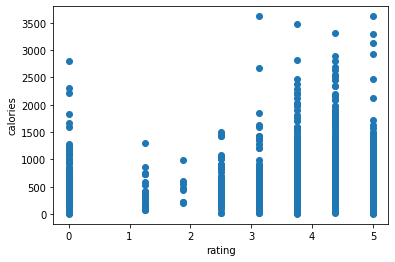

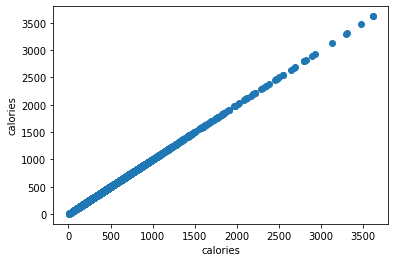

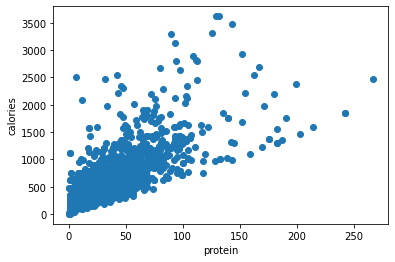

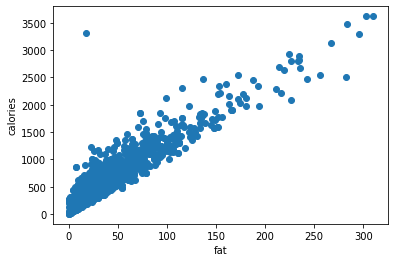

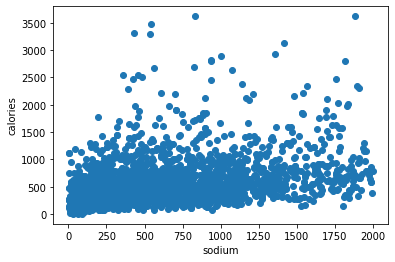

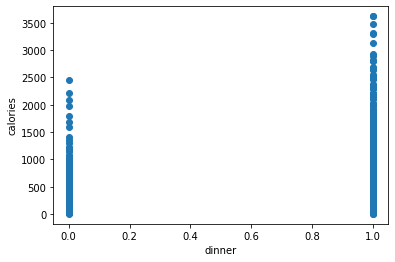

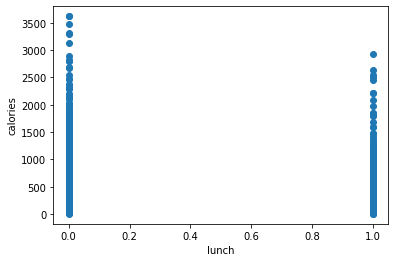

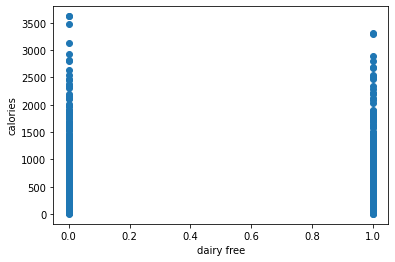

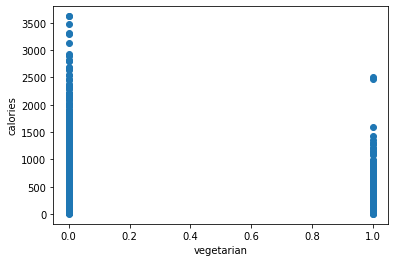

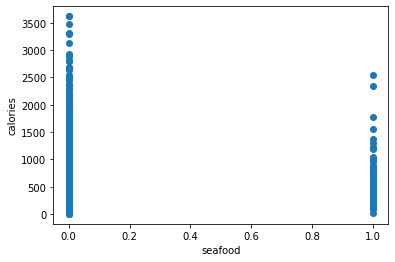

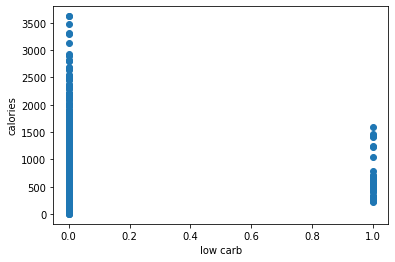

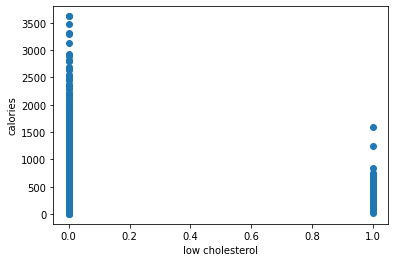

In [20]:
for i, col in enumerate(df.columns):
    plt.scatter(df[col], df['calories'])
    plt.xlabel(str(col))
    plt.ylabel('calories')
    plt.show()

## Multivariate analysis

<AxesSubplot:>

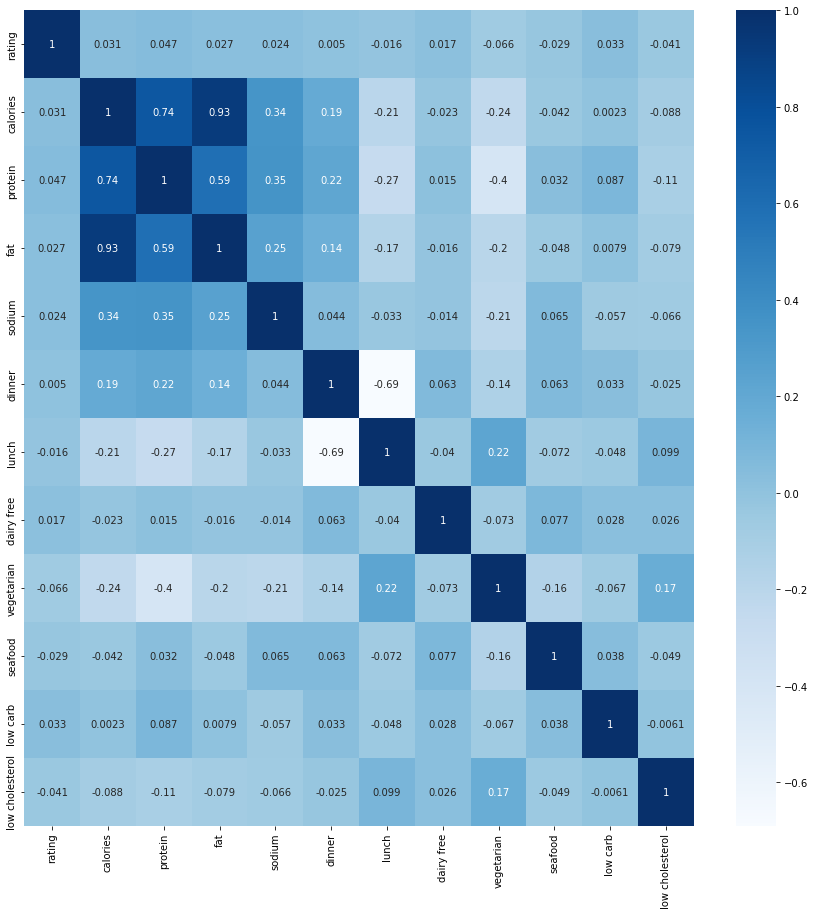

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,cmap='Blues', annot=True, ax=ax)

In [22]:
X = df.drop(['calories', 'lunch', 'dinner'], axis=1)
y = df['calories']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_train = reg1.predict(X_train)
y_pred_test = reg1.predict(X_test)
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False))
print(mean_squared_error(y_test, y_pred_test, squared=False))

0.9197838656111264
0.93722958884026
122.57398844226599
109.39218575966188


In [26]:
tree1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [27]:
y_pred_train = tree1.predict(X_train)
y_pred_test = tree1.predict(X_test)
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False))
print(mean_squared_error(y_test, y_pred_test, squared=False))

0.916540381387451
0.908905272800757
125.02752985428437
131.78179935954057


## Model Selection

According to the better metrics and clear linear dependencies we have seen on the scatter plots, the final model choice is a Multivariate Linear Regression.